Steve Brunton Fourier Analysis: https://www.youtube.com/playlist?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC

# Fourier Series

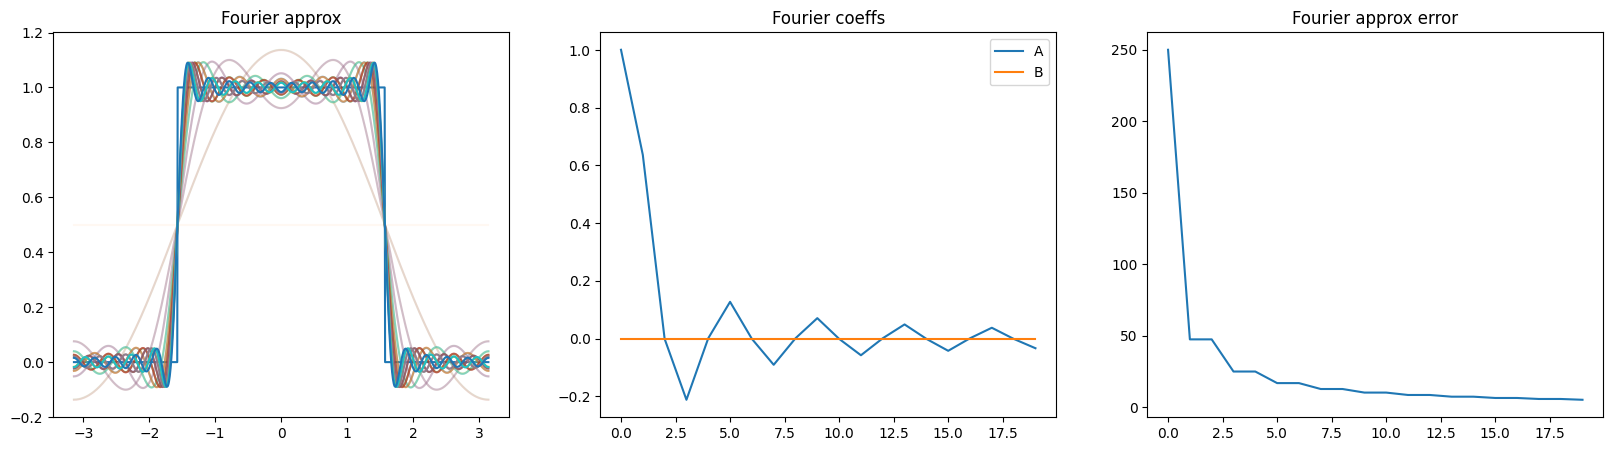

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_approx(x, f, K=20):
    dx = x[1] - x[0]

    fig, (ax, coeff_ax, error_ax) = plt.subplots(1, 3, figsize=(20, 5))
    
    ax.plot(x, f)
    As, Bs = np.zeros(K), np.zeros(K)
    recon_errors = np.zeros_like(As)
    f_recon = 0
    
    for k in range(K):
        cos = np.cos(k * x)
        sin = np.sin(k * x)
        As[k] = np.sum(f * cos) * dx / np.pi
        Bs[k] = np.sum(f * sin) * dx / np.pi

        z = (As[k] * cos) + (Bs[k] * sin)
        if k == 0: z /= 2
        f_recon += z

        ax.plot(x, f_recon, alpha=(k+1)/K)

        recon_errors[k] = np.sum((f - f_recon) ** 2)

    ax.set_title("Fourier approx")

    coeff_ax.plot(As, label="A")
    coeff_ax.plot(Bs, label="B")
    coeff_ax.legend()
    coeff_ax.set_title("Fourier coeffs")

    error_ax.plot(recon_errors)
    error_ax.set_title("Fourier approx error")
    plt.show()

    
x = np.linspace(-np.pi, np.pi, 1_000)
f = np.zeros_like(x)
n = len(x)
f[n//2 - n//4 : n//2 + n//4] = 1
fourier_approx(x, f)

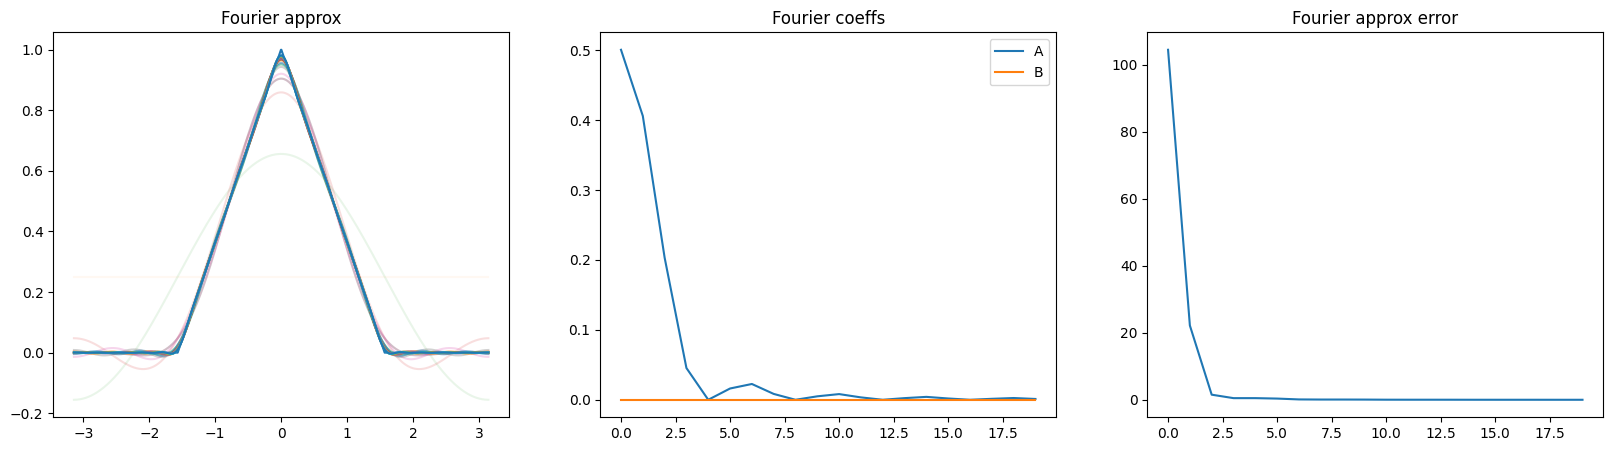

In [2]:
f[n//2 - n//4 : n//2] = np.linspace(0, 1, n//4)
f[n//2 : n//2 + n//4] = np.linspace(1, 0, n//4)
fourier_approx(x, f)

# DFT matrix

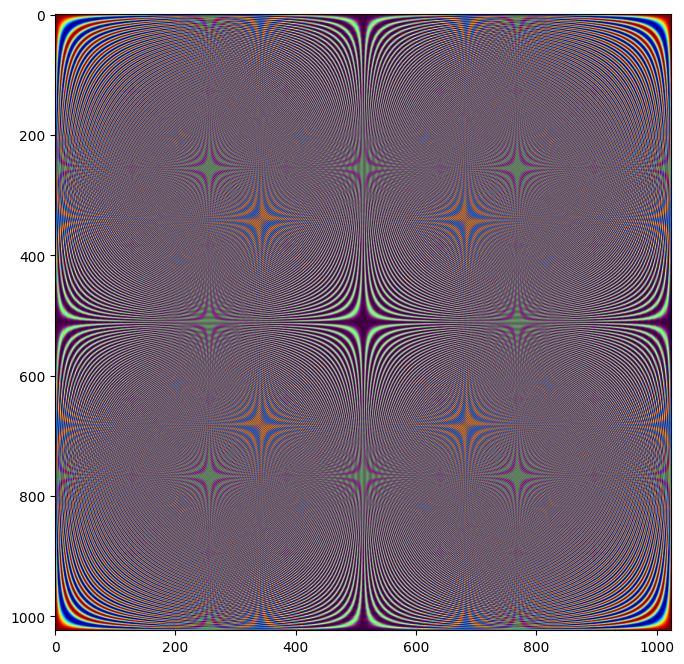

In [18]:
n = 1024
pow = np.arange(n) * np.arange(n)[:, None]
w = np.exp(-1j * 2*np.pi / n)
freqs = w ** pow

plt.figure(figsize=(8, 8))
plt.imshow(freqs.real, cmap="jet")
plt.show()